In [10]:
from src.layers.Models import TinyDiffusion 

from torch.utils.data import DataLoader
from src.data.BaseData import DataSetTinyDiffusion
from src.utils.manage_device import select_device

In [11]:
cfg = {'device': 'cuda', 
 'model_type': {'model_name': 'Residual_with_old_attention'}, 
 'model': {'Model': {'depth': 3, 'size': 256, 'hidden_dim': 800, 'output_dim': 2, 'input_size': 2, 'pos_emb': 'sinusoidal'}, 
           'attention': {'max_length': 1000, 'input_dim': 512, 'output_dim': 2}}, 
 'trainer': {'num_epoch': 100, 'batch_size': 250, 'gradient_clip_threshhold': 1, 'eval_frequency': 10, 'sample_size': 3000}, 
 'dataset': {'number_data_points': 100000, 'joined': 1, 'name_dataset': [['dino', ''], ['mnist', 'density_map_0.pt']]}, 
 'optimizer': {'lr': 0.0001, 'weight_decay': 5e-10}, 'Diffusion': {'num_timesteps': 250, 'beta_start': 0.0001, 'beta_end': 0.02, 'beta_schedule': 'linear'}}



In [14]:
model_name = cfg["model_type"]["model_name"]
device = select_device(cfg['device'])
    # Correct way to merge dictionaries and add a new key in Python
model_config = {**cfg["model"], "device": device}
dataset_config = {**cfg["dataset"], "device": device}
dataset_config["name_dataset"] = [("dino", ""), ("moons", "")]
trainer_config = {
    **cfg["trainer"],
    "data_name": dataset_config["name_dataset"],
    "device": device,
}
optimizer_config = {**cfg["optimizer"]}
diff_config = {**cfg["Diffusion"], "device": device}

In [15]:
tinyDiff_builder = TinyDiffusion(
    model_name, model_config, trainer_config, optimizer_config, diff_config, device
)
print(tinyDiff_builder)
dataset = DataSetTinyDiffusion(**dataset_config)
print(dataset)
train_loader = DataLoader(
    dataset, batch_size=int(trainer_config["batch_size"]), shuffle=False
)
print(train_loader)
tinyDiff_builder.train(train_loader)


[<src.data.CombinedData.CombinedDataset object at 0x7f4e2dca6250>, <src.data.CombinedData.CombinedDataset object at 0x7f4e2c4b1a50>]


Epoch 1/100: 100%|██████████| 800/800 [00:04<00:00, 191.61it/s]


The loss for epoch 1 is 2.1101452590823175


Epoch 2/100:  48%|████▊     | 382/800 [00:01<00:02, 200.36it/s]

In [5]:
import torch
import os 

path_to_best_model = tinyDiff_builder.trainer.checkpoints_dir_path.split('Project_tiny_diffusion/')[-1]
path_to_best_model_attention = os.path.join(path_to_best_model , 'attention_best_loss.pth')
path_to_best_model_model = os.path.join(path_to_best_model , 'model_best_loss.pth')
tinyDiff_builder.model.load_state_dict(torch.load(path_to_best_model_model))
tinyDiff_builder.attention.load_state_dict(torch.load(path_to_best_model_attention))


<All keys matched successfully>

In [6]:
pah = tinyDiff_builder.trainer.model_save_path
print(pah)

/Data/saadelhfr/MAP583/Project_tiny_diffusion/Outputs/Residual_with_old_attention_date_2024-03-15_03_aa0856


In [7]:
import os 
import numpy as np
framse_path = os.path.join(pah, "frames")
framse_np = np.load(
"Outputs/Residual_with_old_attention_date_2024-03-15_03_aa0856/framse.npy"
)

IndexError: index 6 is out of bounds for axis 0 with size 6

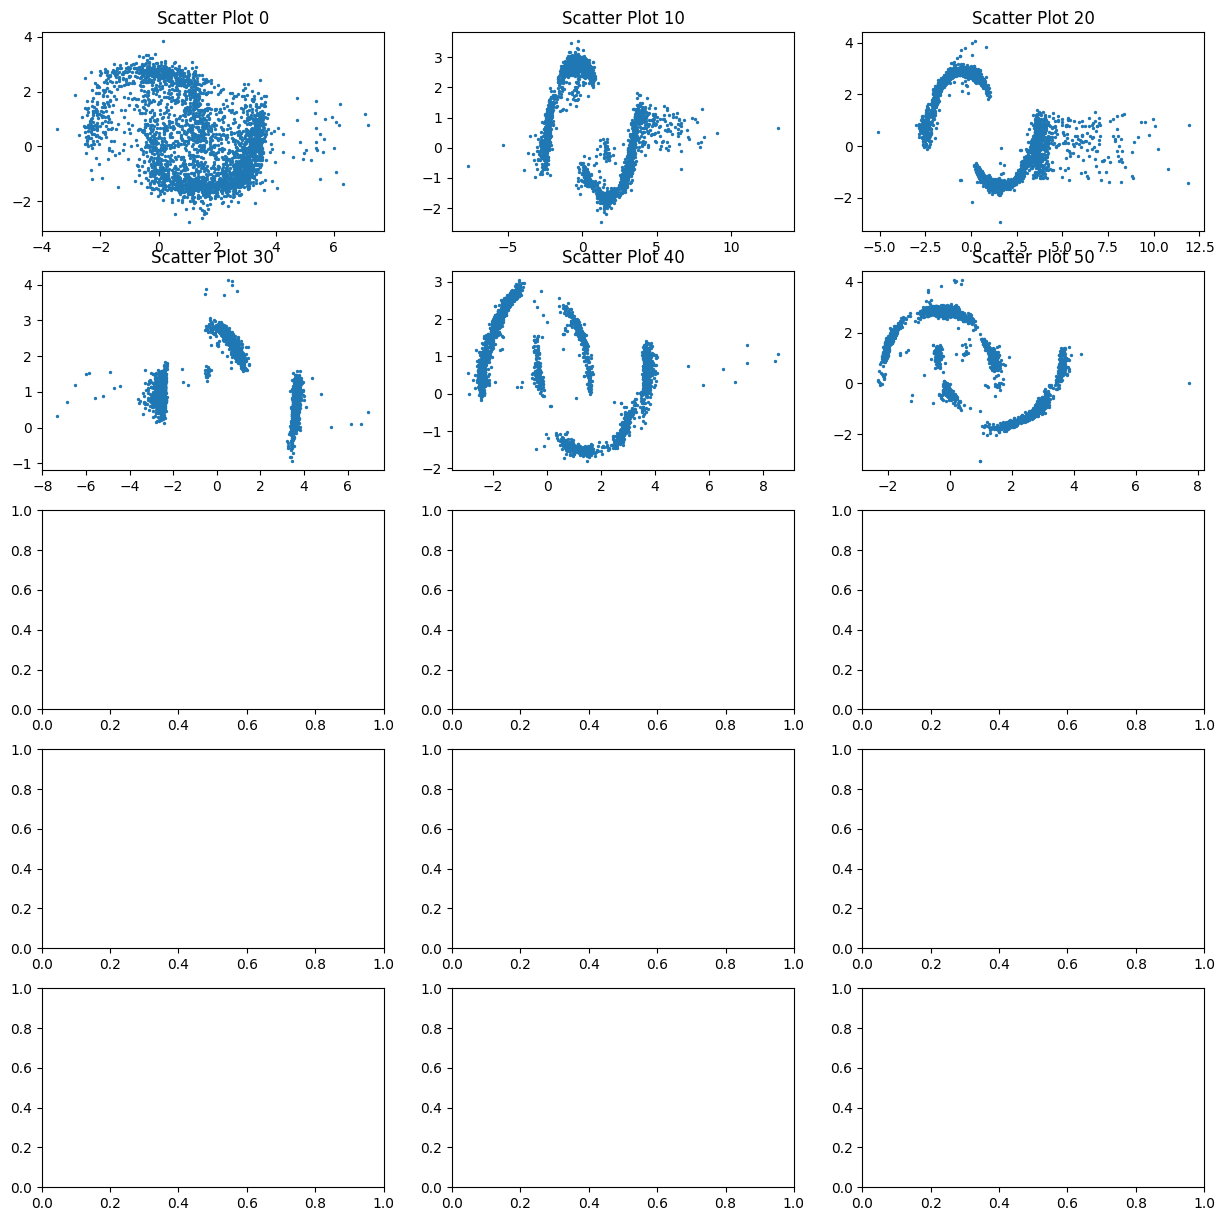

In [8]:
import matplotlib.pyplot as plt


framse_np_1 = framse_np[0]
framse_np_2 = framse_np[-1]

fig, axs = plt.subplots(5, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    ax.scatter(framse_np[i, :, 0], framse_np[i, :, 1], s=2)
    ax.set_title(f"Scatter Plot {i * 10}")

plt.tight_layout()
plt.show()



100%|██████████| 4/4 [00:01<00:00,  2.33it/s]


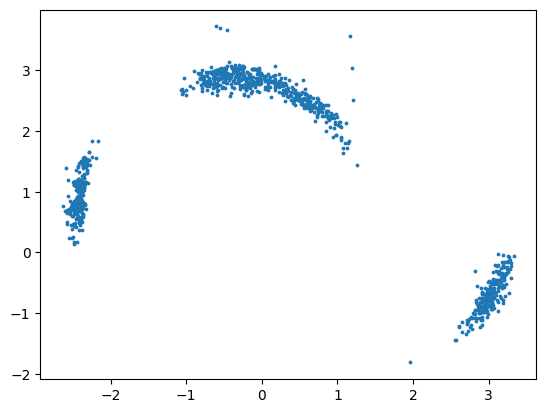

100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


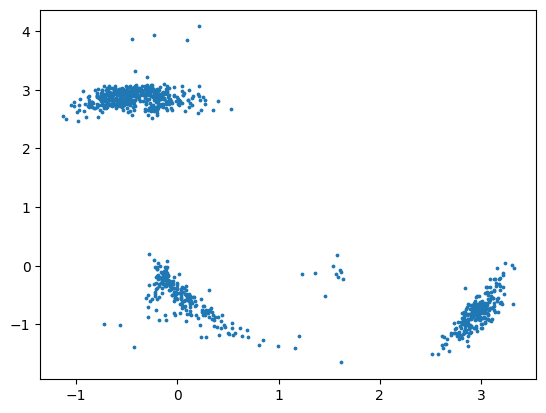

100%|██████████| 4/4 [00:01<00:00,  2.37it/s]


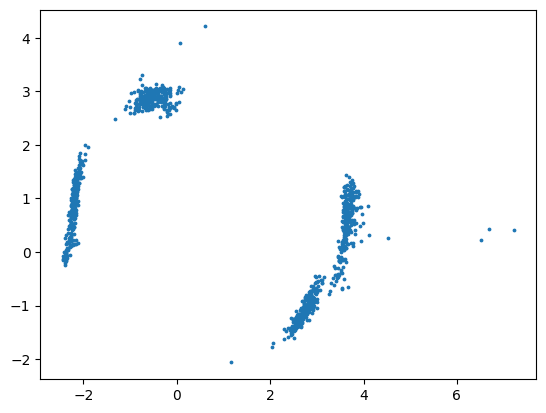

100%|██████████| 4/4 [00:01<00:00,  2.37it/s]


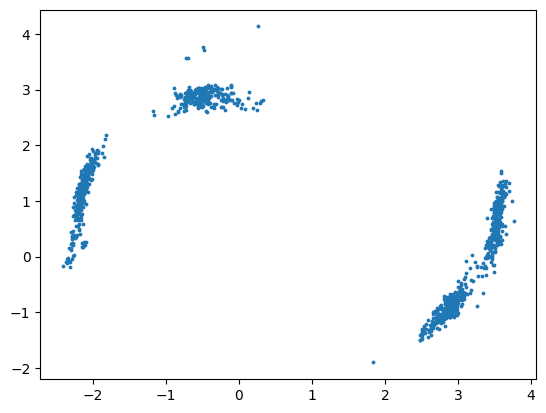

100%|██████████| 4/4 [00:01<00:00,  2.37it/s]


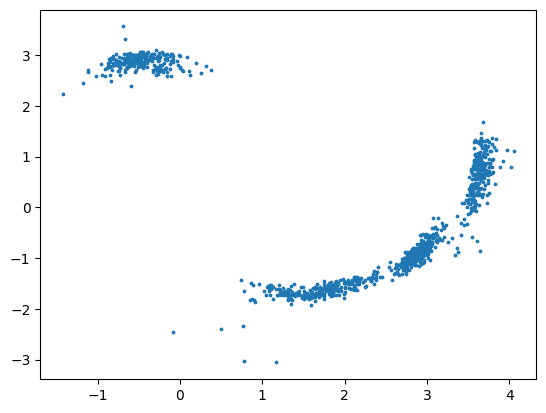

100%|██████████| 4/4 [00:01<00:00,  2.36it/s]


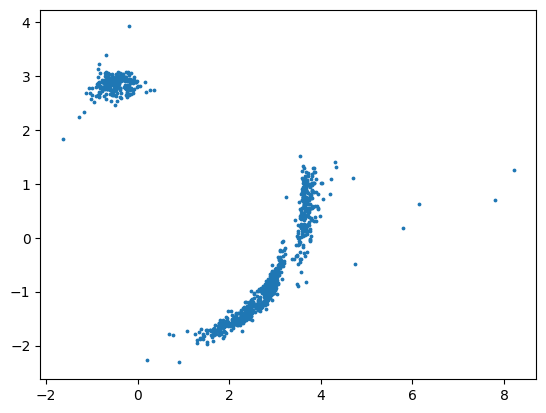

100%|██████████| 4/4 [00:01<00:00,  2.37it/s]


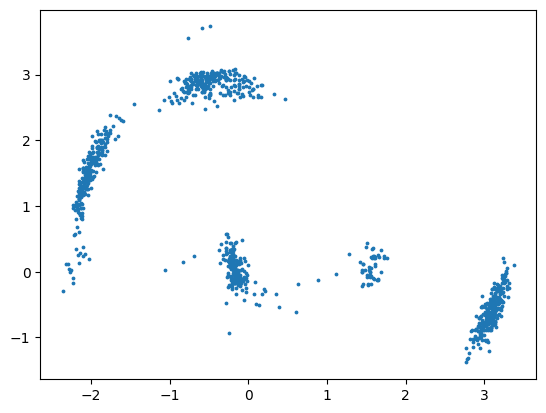

100%|██████████| 4/4 [00:01<00:00,  2.36it/s]


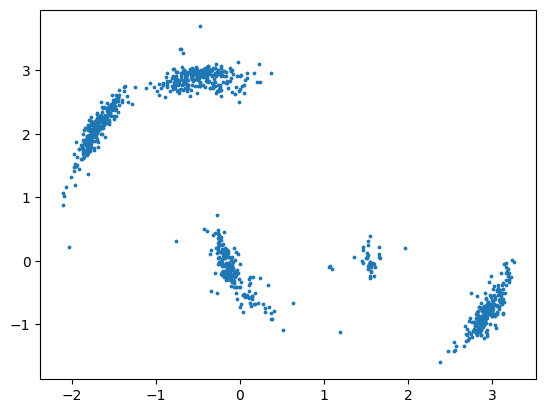

100%|██████████| 4/4 [00:01<00:00,  2.36it/s]


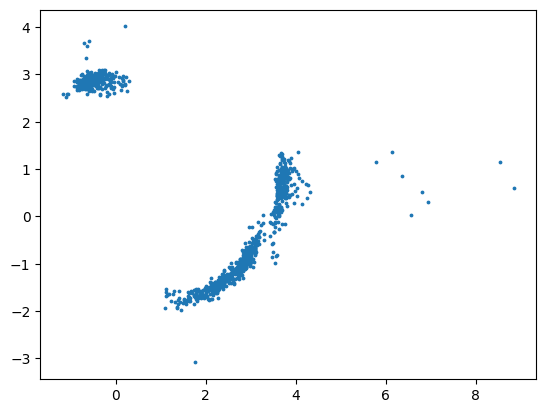

100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


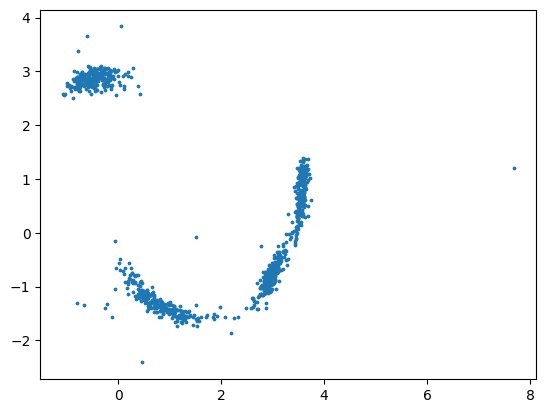

In [9]:
# sampleing : 

for _ in range(10): 
    sample = tinyDiff_builder.trainer.sample(1000) 
    
    sample_np = np.concatenate(sample , axis=0)

    plt.scatter(sample_np[:, 0], sample_np[:, 1] , s = 3)
    plt.show()


